In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json,os
import pandas as pd
from sklearn.linear_model import LinearRegression

In [97]:
data_folfer = 'data/'
with open(f"flink_metric_data_new/1dh1e3d93h944idh991i576e48917264_13604_129570_read_records_per_second.json") as f:
    data = json.load(f)

In [98]:
df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()

,average,timestamp
0,50.22,1541174400000
1,54.04,1541174700000
2,60.96,1541175000000
3,33.19,1541175300000
4,33.30,1541175600000


In [101]:
df['timestamp']=pd.to_datetime(df['timestamp'],unit='ms')

In [102]:
print(df['timestamp'])

0      2018-11-02 16:00:00
1      2018-11-02 16:05:00
2      2018-11-02 16:10:00
3      2018-11-02 16:15:00
4      2018-11-02 16:20:00
               ...        
2012   2018-11-09 15:40:00
2013   2018-11-09 15:45:00
2014   2018-11-09 15:50:00
2015   2018-11-09 15:55:00
2016   2018-11-09 16:00:00
Name: timestamp, Length: 2017, dtype: datetime64[ns]


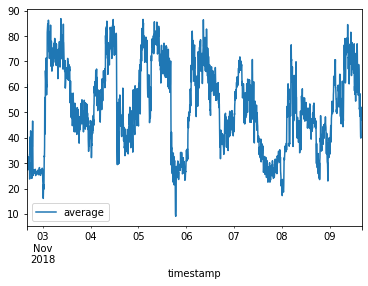

In [103]:
df.set_index('timestamp').plot()

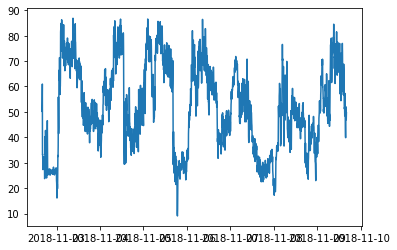

In [104]:
plt.plot(df['timestamp'],df['average'])

In [31]:
names=os.listdir(path="flink_metric_data_new")


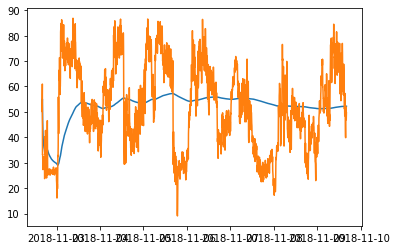

In [105]:
S=0
n=0
predict=[]
for i in df['average']:
    S+=i
    n+=1
    pre=S/n
    predict.append(pre)
plt.plot(df['timestamp'],predict)
plt.plot(df['timestamp'],df['average'])

               
    

In [63]:
def L(a,b):
    S=0
    l=len(a)
    for i in range(l):
        S+=abs(a[i]-b[i])
    return S/l

In [64]:
def MSE(a,b):
    S=0
    l=len(a)
    for i in range(l):
        S+=(a[i]-b[i])**2
    return S/l

In [65]:
def RMSE(a,b):
    S=0
    l=len(a)
    for i in range(l):
        S+=(a[i]-b[i])**2
    return np.sqrt(S/l)

In [66]:
print(L(predict,df['average']))
print(MSE(predict,df['average']))
print(RMSE(predict,df['average']))

13.612802054832022
278.9439840809405
16.70161621164073


2017 2017


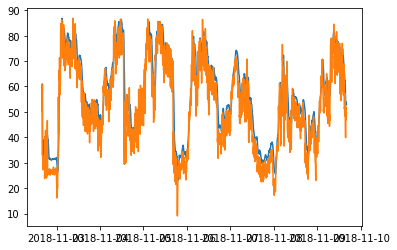

In [106]:
def predict1(dt,k):
    S=0
    predict=[]
    for i in range(k+1):
        predict.append(dt[i])
    for i in range (len(dt)):
        S+=dt[i]
        if(i<k+1):
            continue
        S-=dt[i-k]
        pre=S/k
        predict.append(pre)
    return predict
pred=predict1(df['average'],10)
print(len(pred),len(df['average']))
plt.plot(df['timestamp'],pred)
plt.plot(df['timestamp'],df['average'])


In [68]:
def mis1(k):
    return L(predict1(df['average'],k),df['average'])
def mis2(k):
    return MSE(predict1(df['average'],k),df['average'])
def mis3(k):
    return RMSE(predict1(df['average'],k),df['average'])
print(mis1(10))
print(mis2(10))
print(mis3(10))

6.004536936043762
55.120134541895716
7.424293538236195


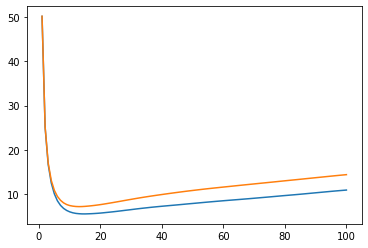

In [88]:
N=[]
K1=[]
K2=[]
K3=[]
for i in range(100):
    N.append(i+1)
    K1.append(mis1(i+1))
    K2.append(mis2(i+1))
    K3.append(mis3(i+1))
plt.plot(N,K1)

plt.plot(N,K3)

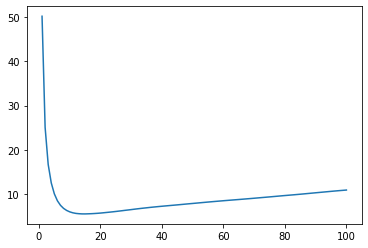

In [70]:
plt.plot(N,K1)

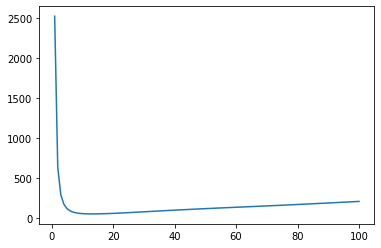

In [71]:
plt.plot(N,K2)

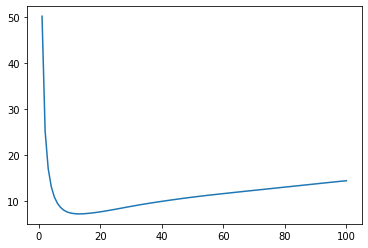

In [72]:
plt.plot(N,K3)

1.5960214631005392
4.772268869113825
2.184552326934245


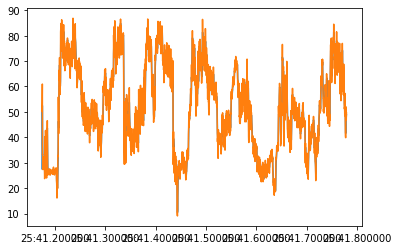

In [73]:
S=0
n=0
predict=[]
for i in df['average']:
    S=(S*0.9+i*1.1)/2
    n+=1
    predict.append(S)
print(L(predict,df['average']))
print(MSE(predict,df['average']))
print(RMSE(predict,df['average']))
plt.plot(df['timestamp'],predict)
plt.plot(df['timestamp'],df['average'])

In [181]:
learnX=df['average'][:1000]
learnY=df['average'][1:1001]
testX=df['average'][1000:2016]
testY=df['average'][1001:2017]

In [167]:
print(learnX,learnY)

0      50.22
1      54.04
2      60.96
3      33.19
4      33.30
       ...  
995    79.56
996    81.96
997    78.86
998    71.59
999    67.70
Name: average, Length: 1000, dtype: float64 1       54.04
2       60.96
3       33.19
4       33.30
5       28.78
        ...  
996     81.96
997     78.86
998     71.59
999     67.70
1000    69.11
Name: average, Length: 1000, dtype: float64


In [185]:
x = np.array(learnX).reshape((-1, 1))
y = np.array(learnY)
x1 = np.array(testX).reshape((-1, 1))
y1 = np.array(testY)



intercept: 1.9107399545186894
slope: [0.96520858]
predicted response:
[50.3835148  54.07061158 60.74985495 33.9460127  34.05218564 29.68944287
 28.26093417 30.19135133 30.69325979 33.15454167 32.90358743 33.00976038
 31.01177862 31.17586408 33.04836872 30.6836077  31.11795156 24.82479163
 25.25913549 32.69124155 40.81829778 35.21043594 33.90740436 43.12514629
 41.12716453 37.97093248 35.48069434 39.84343712 32.40167897 28.579453
 25.07574586 36.61964046 39.05196608 37.1408531  43.81044438 46.8508514
 34.66026705 28.43467171 26.18573572 28.15476122 28.0389362  27.41155062
 26.89999007 26.93859841 28.39606337 27.17990056 27.61424442 27.82659031
 28.07754454 27.40189853 27.75902571 28.52154048 27.72041736 26.14712738
 26.35947327 26.39808161 27.24746516 27.2185089  27.00616302 26.76486087
 27.75902571 27.46946313 27.07372762 27.50807148 27.32468185 27.54667982
 28.18371748 27.18955265 27.86519865 26.5428629  28.00997994 27.24746516
 26.5428629  26.46564621 26.79381713 28.86901557 29.18753

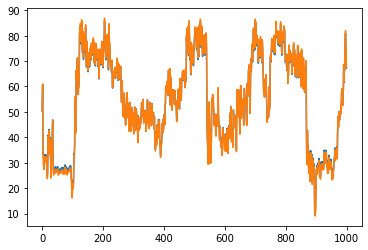

In [170]:
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.plot(y_pred)
plt.plot(x)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('predicted response:', y_pred, sep='\n')
print(x)

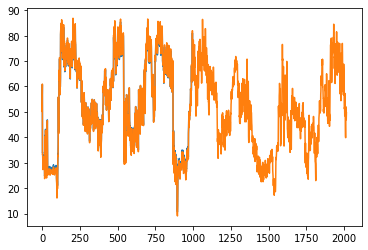

In [171]:
y_pred = model.intercept_ + model.coef_ * x
plt.plot(y_pred)
plt.plot(df['average'])

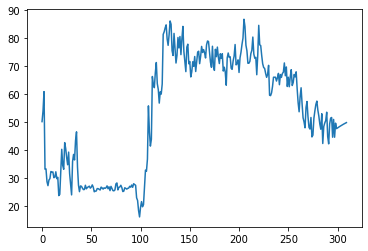

In [173]:
y1=[]
for i in range(300):
    y1.append(df['average'][i])
for i in range(10):
    y1.append(model.intercept_ + model.coef_ * y1[-1])
plt.plot(y1)


In [174]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [178]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x, y)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [180]:
regressor.score(x, y)

0.9788290270500501

In [187]:
regressor.score(x1, y1)

0.8566950948297082

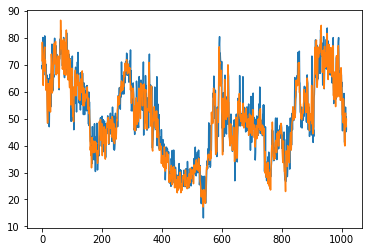

In [201]:
plt.plot(regressor.predict(x1))
plt.plot(y1)

In [114]:
mean1=[]
mean2=[]
mean3=[]
mean4=[]
spread1=[]
spread2=[]
spread3=[]
spread4=[]
zero=[]
period1=[]
period2=[]

In [115]:
files=os.listdir(path="flink_metric_data_new")
har1=[]
har2=[]
har3=[]
for i in files:
    name=f"flink_metric_data_new/"+i
    with open(name) as f:
        data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df.head()
    me=np.mean(df['average'])
    ma=np.max(df['average'])
    har1.append(me)
    har2.append(np.min(df['average']))
    har3.append(ma)
    if(me<100):
        mean1.append(i)
    elif(me<1000):
        mean2.append(i)
    elif(me<10000):
        mean3.append(i)
    else:
        mean4.append(i)
    if(ma==0):
        zero.append(i)
    elif(ma<me*5):
        spread1.append(i)
    elif(ma<me*10):
        spread2.append(i)
    elif(ma<me*20):
        spread3.append(i)
    else:
        spread4.append(i)
    pa=me+(ma-me)/2
    result = np.where(np.logical_and(df['average']>= pa*0.9,df['average']<= pa*1.1))
    if(len(result)<7):
        period1.append(i)
    else:
        period2.append(i)
        
    

In [116]:
print("средняя нагрузка")
print(len(mean1))
print(len(mean2))
print(len(mean3))
print(len(mean4))
print("разброс")
print(len(spread1))
print(len(spread2))
print(len(spread3))
print(len(spread4))
print("пустые")
print(len(zero))
print("период")
print(len(period1))
print(len(period2))

средняя нагрузка
577
129
63
21
разброс
299
46
19
100
пустые
326
период
790
0


In [121]:
print(f"print some value {len(spread1)}")

print some value 299


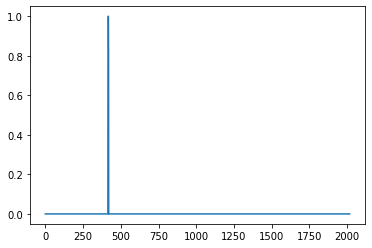

In [76]:
name=f"flink_metric_data_new/"+spread4[0]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

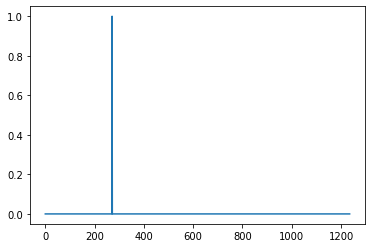

In [122]:
name=f"flink_metric_data_new/"+spread4[15]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

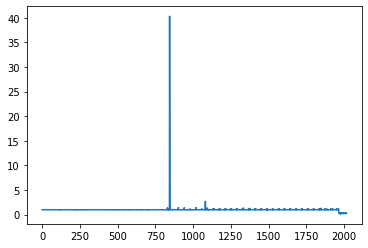

In [79]:
name=f"flink_metric_data_new/"+spread4[2]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

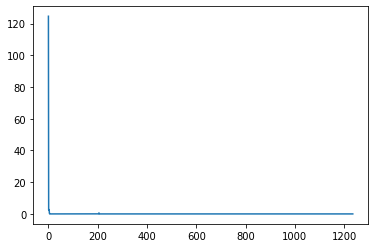

In [80]:
name=f"flink_metric_data_new/"+spread4[10]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

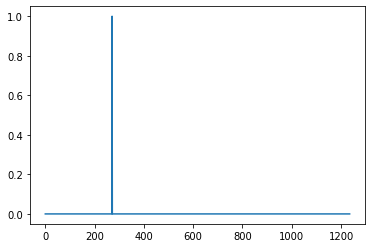

In [81]:
name=f"flink_metric_data_new/"+spread4[15]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

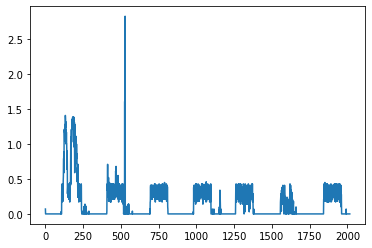

In [83]:
name=f"flink_metric_data_new/"+spread3[0]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

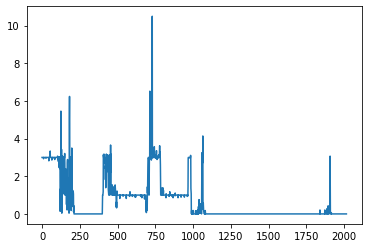

In [84]:
name=f"flink_metric_data_new/"+spread3[1]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

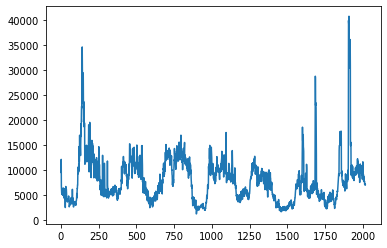

In [85]:
name=f"flink_metric_data_new/"+spread2[0]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

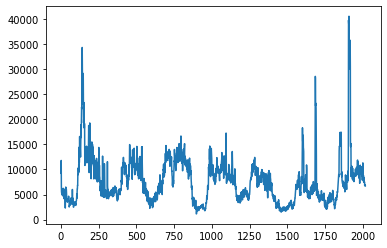

In [86]:
name=f"flink_metric_data_new/"+spread2[1]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

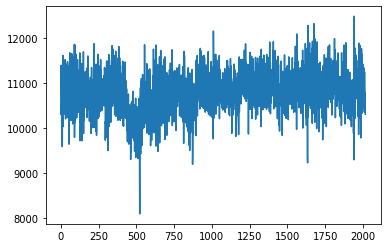

In [125]:
name=f"flink_metric_data_new/"+spread1[30]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])

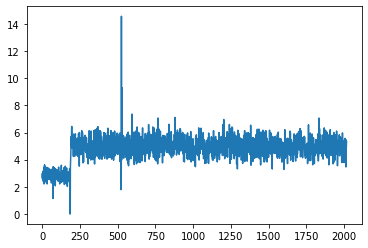

In [90]:
name=f"flink_metric_data_new/"+spread1[10]
with open(name) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
df.drop('unit',axis=1,inplace=True)
df.head()
plt.plot(df['average'])